# Gathering of Unstructured Data 

In [25]:
#Installing Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)


# Training Data in file 'nikhil_training_tweets.csv'

In [26]:
tweets_all = pd.read_csv('nikhil_training_tweets.csv')
tweets_all.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School to...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [27]:
tweets_all[:10]

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School to...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


# Data Cleaning

In [28]:
#change column names
tweets_all.columns = ['label', 'tweet_id', 'date_time', 'nothing', 'user_id', 'tweet']
tweets_all.head()

,label,tweet_id,date_time,nothing,user_id,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School to...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [29]:
#dropping nothing column
tweets_all = tweets_all.drop(columns=['nothing'])
tweets_all.head()

,label,tweet_id,date_time,user_id,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School to...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


# Shrinking Data From 1.05 Million to 60k

In [30]:
#making small training data
original_shape = tweets_all.shape
tweets_all = tweets_all[770000:830000]
tweets_all

,label,tweet_id,date_time,user_id,tweet
770000,0,2301837999,Tue Jun 23 15:58:55 PDT 2009,Professional112,movie theater here isnt doing midnight showings. wearing my starscream t-shirt. feels good
770001,0,2301838237,Tue Jun 23 15:58:56 PDT 2009,dickiesaurussex,"home and bored. feel like chattin to people on msn, but no one [good] is on."
770002,0,2301838354,Tue Jun 23 15:58:56 PDT 2009,LuPrinz,@travisWfreeman why are you leaving us???
770003,0,2301838493,Tue Jun 23 15:58:57 PDT 2009,SueFisk,@shiregames
770004,0,2301838567,Tue Jun 23 15:58:57 PDT 2009,veronicabunny,just dropped my golf off at garnet vw. paying $100 to get it diagnosed. but my final bill will p...
...,...,...,...,...,...
829995,4,1557244959,Sun Apr 19 02:53:35 PDT 2009,justaddbooks,@krissa22 Thank you!
829996,4,1557244961,Sun Apr 19 02:53:35 PDT 2009,gh_rocks,dreaming of you
829997,4,1557245003,Sun Apr 19 02:53:37 PDT 2009,nick_wellings,@TheEllenShow I saw a clip online! good show!
829998,4,1557245022,Sun Apr 19 02:53:38 PDT 2009,traceym1972,"@msdivineknight k hun, no worries! xx"


In [31]:
#printing the size of dataframe, tweets_all, and tweets_less
print('Original Dataset Size:', original_shape)
print('Less Dataset Size:', tweets_all.shape)

Original Dataset Size: (1048575, 5)
Less Dataset Size: (60000, 5)


In [32]:
tweets_all['label'] = tweets_all['label'].replace([4],1)

In [33]:
tweets_all

,label,tweet_id,date_time,user_id,tweet
770000,0,2301837999,Tue Jun 23 15:58:55 PDT 2009,Professional112,movie theater here isnt doing midnight showings. wearing my starscream t-shirt. feels good
770001,0,2301838237,Tue Jun 23 15:58:56 PDT 2009,dickiesaurussex,"home and bored. feel like chattin to people on msn, but no one [good] is on."
770002,0,2301838354,Tue Jun 23 15:58:56 PDT 2009,LuPrinz,@travisWfreeman why are you leaving us???
770003,0,2301838493,Tue Jun 23 15:58:57 PDT 2009,SueFisk,@shiregames
770004,0,2301838567,Tue Jun 23 15:58:57 PDT 2009,veronicabunny,just dropped my golf off at garnet vw. paying $100 to get it diagnosed. but my final bill will p...
...,...,...,...,...,...
829995,1,1557244959,Sun Apr 19 02:53:35 PDT 2009,justaddbooks,@krissa22 Thank you!
829996,1,1557244961,Sun Apr 19 02:53:35 PDT 2009,gh_rocks,dreaming of you
829997,1,1557245003,Sun Apr 19 02:53:37 PDT 2009,nick_wellings,@TheEllenShow I saw a clip online! good show!
829998,1,1557245022,Sun Apr 19 02:53:38 PDT 2009,traceym1972,"@msdivineknight k hun, no worries! xx"


# Exploratory Data Analysis

In [34]:
!pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

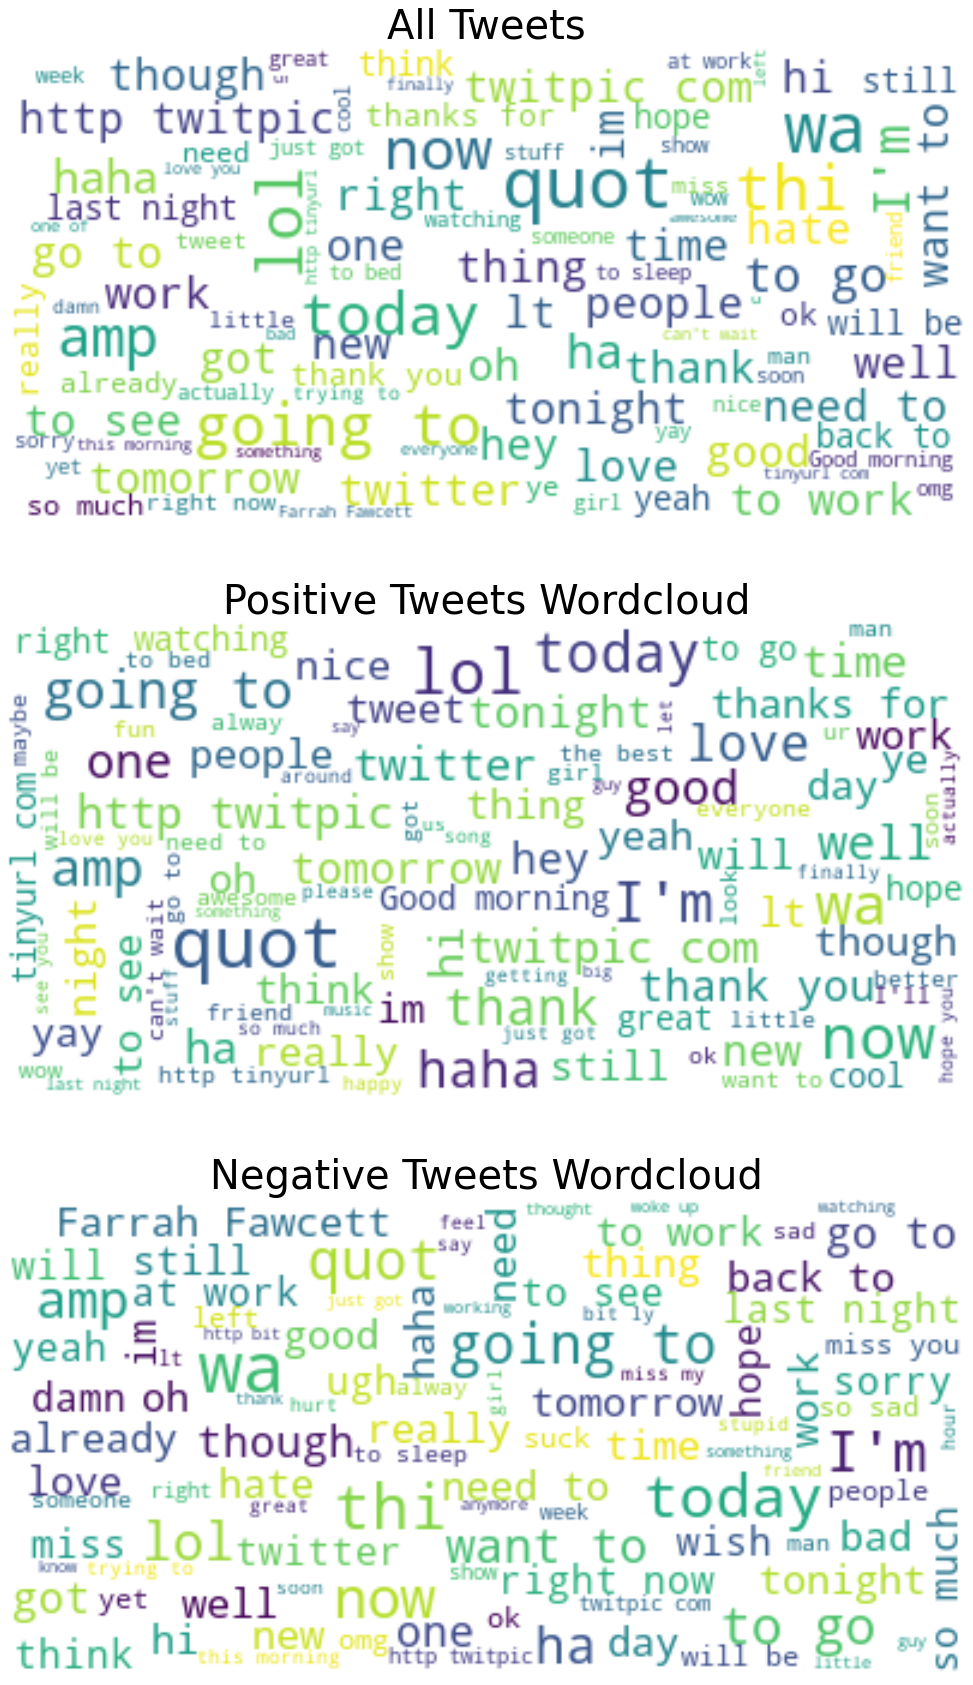

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
positive_all = tweets_all[tweets_all['label']==1]
negative_all = tweets_all[tweets_all['label']==0]

tweet_all_wc = " ".join(tw for tw in tweets_all.tweet) # this is a single list, wholein " "
positive_all_wc = " ".join(tw for tw in positive_all.tweet) # this is a single list, wholein " "
negative_all_wc = " ".join(tw for tw in negative_all.tweet) # this is a single list, wholein " "

#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ax = plt.subplots(3, 1 ,figsize = (30, 30)) #height #width #pixelsize

#creating wordcloud image
wordcloud_all = WordCloud(max_font_size = 30, max_words = 100, background_color = 'white').generate(tweet_all_wc)
wordcloud_positive = WordCloud(max_font_size = 30, max_words = 100, background_color = 'white').generate(positive_all_wc)
wordcloud_negative = WordCloud(max_font_size = 30, max_words = 100, background_color = 'white').generate(negative_all_wc)


# Display the generated image:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=40)
ax[0].axis('off')
ax[1].imshow(wordcloud_positive, interpolation='bilinear')
ax[1].set_title('Positive Tweets Wordcloud',fontsize=40)
ax[1].axis('off')
ax[2].imshow(wordcloud_negative, interpolation='bilinear')
ax[2].set_title('Negative Tweets Wordcloud',fontsize=40)
ax[2].axis('off')

# Word Embedding Model (LSTM)

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Embedding

In [37]:
### Vocabulary size
voc_size=10000

In [38]:
## Get the Independent Features

X=tweets_all.drop('label',axis=1)

In [39]:
## Get the Dependent features
y=tweets_all['label']

In [40]:
X.shape

(60000, 4)

In [41]:
y.shape

(60000,)

# Preprocessing - StopWords, Stemming, Cleaning

In [42]:
import nltk
import re
from nltk.corpus import stopwords

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nikhil
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in range(0, len(X)):
    tweets = re.sub('[^a-zA-Z]', ' ', X['tweet'].iloc[i])
    tweets = tweets.lower()
    tweets = tweets.split()
    
    tweets = [ps.stem(word) for word in tweets if not word in stopwords.words('english')]
    tweets = ' '.join(tweets)
    corpus.append(tweets)
    

In [45]:
corpus[0]

'movi theater isnt midnight show wear starscream shirt feel good'

In [46]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[0]

[3467, 404, 7199, 1742, 1699, 262, 2870, 8798, 3957, 6642]

# Word Embedding Representation

In [47]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 8798 3957 6642]
 [   0    0    0 ... 2848 6247 6642]
 [   0    0    0 ...  449 2238 6222]
 ...
 [   0    0    0 ... 2391 6642 1699]
 [   0    0    0 ... 5459 6991 7856]
 [   0    0    0 ... 2008 8727 5761]]


In [48]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, 3467,  404, 7199,
       1742, 1699,  262, 2870, 8798, 3957, 6642])

# Creating LSTM Model

In [49]:
## Creating model
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 100)           1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
len(embedded_docs),y.shape

(60000, (60000,))

In [51]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [52]:
X_final.shape,y_final.shape

((60000, 40), (60000,))

# Training and Cross Validation

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=20)

In [80]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Train on 40200 samples, validate on 19800 samples
Epoch 1/10
40200/40200 [==============================] - 57s 1ms/sample - loss: 0.3371 - accuracy: 0.8872 - val_loss: 0.3223 - val_accuracy: 0.8826
Epoch 2/10
40200/40200 [==============================] - 57s 1ms/sample - loss: 0.1808 - accuracy: 0.9386 - val_loss: 0.3776 - val_accuracy: 0.8697
Epoch 3/10
40200/40200 [==============================] - 56s 1ms/sample - loss: 0.1055 - accuracy: 0.9656 - val_loss: 0.4665 - val_accuracy: 0.8595
Epoch 4/10
40200/40200 [==============================] - 58s 1ms/sample - loss: 0.0635 - accuracy: 0.9796 - val_loss: 0.5735 - val_accuracy: 0.8492
Epoch 5/10
40200/40200 [==============================] - 56s 1ms/sample - loss: 0.0414 - accuracy: 0.9861 - val_loss: 0.6761 - val_accuracy: 0.8445
Epoch 6/10
40200/40200 [==============================] - 57s 1ms/sample - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.8011 - val_accuracy: 0.8397
Epoch 7/10
40200/40200 [==============================] 

In [81]:
y_pred=model.predict_classes(X_test)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_test,y_pred)

array([[8276, 1693],
       [1656, 8175]], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8308585858585859

# Twitter API

In [85]:
import tweepy

In [86]:
access_token = '740071211523264512-a4CDoXv6L3ZP8v41QyLnWo2rTW0Rum7'
access_token_secret = 'Eu3qrJNGL3ocGZNOt7dm3bG4LvwjBxNfLeIsaveqPCmRT'

api_key = '6CjV0v3Fl63O1uhBKiUbuHUux'
api_secret_key = 'rlRxuUl5nBRAG7hY3wAf1NeCQgNwa3bGtJgV9fgQDoZDl2AQOx'

In [87]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

In [88]:
api = tweepy.API(auth)

In [89]:
public_tweets = api.search(q = 'spacex')
df = pd.DataFrame(columns=['special_tweets'])
for tweet in public_tweets:
    df = df.append({'special_tweets': tweet.text}, ignore_index=True)
df

,special_tweets
0,"RT @ActualidadRT: Un prototipo del vehículo de lanzamiento súper pesado Starship, desarrollado p..."
1,SpaceX y el Helio3
2,RT @dfuji1: 第8回目のスターリンク衛星の打ち上げは、無事に成功しました。平塚からは、打ち上げから18時間後の明日3時半前に良い条件で見ることができそうです。もし早起きができた方は、...
3,"Grosse nouvelle pour SpaceX (oui, encore...) : ils auront dorénavant le droit d'utiliser des éta..."
4,RT @SpaceX: Successful deployment of 60 Starlink satellites confirmed https://t.co/adsQIKfT0F
5,RT @SpaceX: Successful deployment of 60 Starlink satellites confirmed https://t.co/adsQIKfT0F
6,RT @SpaceX: Successful deployment of 60 Starlink satellites confirmed https://t.co/adsQIKfT0F
7,RT @SpaceX: Falcon 9’s first stage has landed on the Just Read the Instructions droneship – the ...
8,RT @RamirezClaudia_: Igualito al SpaceX
9,RT @vm_one1: If you rename companies \n\n$tsla = Earth Saver Inc\n#spacex = Earth Backup Inc\n\n...


In [90]:
df.shape

(15, 1)

In [91]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    tweets = re.sub('[^a-zA-Z]', ' ', df['special_tweets'].iloc[i])
    tweets = tweets.lower()
    tweets = tweets.split()
    
    tweets = [ps.stem(word) for word in tweets if not word in stopwords.words('english')]
    tweets = ' '.join(tweets)
    corpus.append(tweets)
    

In [92]:
corpus

['rt actualidadrt un prototipo del veh culo de lanzamiento per pesado starship desarrollado por spacex explot en una instalaci n de pr',
 'spacex el helio',
 'rt dfuji',
 'gross nouvel pour spacex oui encor il auront dor navant le droit utilis de tage r utili et http co hymx alaz',
 'rt spacex success deploy starlink satellit confirm http co adsqikft f',
 'rt spacex success deploy starlink satellit confirm http co adsqikft f',
 'rt spacex success deploy starlink satellit confirm http co adsqikft f',
 'rt spacex falcon first stage land read instruct droneship first orbit class rocket booster succ',
 'rt ramirezclaudia igualito al spacex',
 'rt vm one renam compani tsla earth saver inc spacex earth backup inc elonmusk',
 'jonnytickl spacex excel way see everyon strive build better trampolin',
 'spacex reus falcon rocket fifth time deploy starlink satellit fleet http co dph nxc http co joyou hae',
 'rt dedektifpipo spacex uzaya g nderdi son roket falcon un maliyeti milyon dolar olurken me

In [93]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[0]

[1936,
 21,
 7990,
 4104,
 9583,
 5447,
 6511,
 3785,
 4677,
 2140,
 4024,
 3718,
 5125,
 8148,
 4132,
 8817,
 7577,
 3647,
 2675,
 2578,
 3785,
 3934]

# Padded Doc

In [94]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0 1936   21 7990 4104 9583 5447 6511 3785 4677 2140
  4024 3718 5125 8148 4132 8817 7577 3647 2675 2578 3785 3934]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0 4132 6049 9680]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 1936 8192]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0 6125 8308 3691 4132 7291 6357 4256 7510 4893 6392
    75 6478 1672 3785  497 6463 7340 1391 7773 8360 8599 6493]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 1936 4132 4681 5558 6

In [95]:
embedded_docs[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, 1936, 4132, 4681, 5558,
       6110, 8895, 8251, 7773, 8360, 7482, 6760])

In [96]:
#predictions

X_special=np.array(embedded_docs)

y_hats = model.predict_classes(X_special)

In [97]:
df['prediction_lstm'] = y_hats
df

,special_tweets,prediction_lstm
0,"RT @ActualidadRT: Un prototipo del vehículo de lanzamiento súper pesado Starship, desarrollado p...",0
1,SpaceX y el Helio3,1
2,RT @dfuji1: 第8回目のスターリンク衛星の打ち上げは、無事に成功しました。平塚からは、打ち上げから18時間後の明日3時半前に良い条件で見ることができそうです。もし早起きができた方は、...,1
3,"Grosse nouvelle pour SpaceX (oui, encore...) : ils auront dorénavant le droit d'utiliser des éta...",0
4,RT @SpaceX: Successful deployment of 60 Starlink satellites confirmed https://t.co/adsQIKfT0F,0
5,RT @SpaceX: Successful deployment of 60 Starlink satellites confirmed https://t.co/adsQIKfT0F,0
6,RT @SpaceX: Successful deployment of 60 Starlink satellites confirmed https://t.co/adsQIKfT0F,0
7,RT @SpaceX: Falcon 9’s first stage has landed on the Just Read the Instructions droneship – the ...,1
8,RT @RamirezClaudia_: Igualito al SpaceX,0
9,RT @vm_one1: If you rename companies \n\n$tsla = Earth Saver Inc\n#spacex = Earth Backup Inc\n\n...,1


In [135]:
tweets_all.to_csv('tweets_all_csv.csv')